In [ ]:
#import libraries 
import pandas as pd
import numpy as np

#display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
#load the gene expression data
data = pd.read_csv('../data/data.csv', index_col=0)

#load the labels (aka cancer types)
labels = pd.read_csv('../data/labels.csv', index_col=0)

print("Data loaded successfully.")
print(f"Gene expression data shape: {data.shape}")
print(f"Lables data shape: {labels.shape}")


Data loaded successfully.
Gene expression data shape: (801, 20531)
Lables data shape: (801, 1)


In [3]:
#look at the first few rows of gene expression data
print("First 5 samples and first 5 genes")
print(data.iloc[:5, :5])
print("\n" + "="*50 + "\n")

#look at the shape more clearly
print(f"We have {data.shape[0]} samples (patients)")
print(f"We have {data.shape[1]} genes measured")


First 5 samples and first 5 genes
          gene_0    gene_1    gene_2    gene_3     gene_4
sample_0     0.0  2.017209  3.265527  5.478487  10.431999
sample_1     0.0  0.592732  1.588421  7.586157   9.623011
sample_2     0.0  3.511759  4.327199  6.881787   9.870730
sample_3     0.0  3.663618  4.507649  6.659068  10.196184
sample_4     0.0  2.655741  2.821547  6.539454   9.738265


We have 801 samples (patients)
We have 20531 genes measured


In [4]:
#look at the cancer type labels
print("First 10 samples and their cancer types:")
print(labels.head(10))
print("\n" + "="*50 + "\n")

First 10 samples and their cancer types:
         Class
sample_0  PRAD
sample_1  LUAD
sample_2  PRAD
sample_3  PRAD
sample_4  BRCA
sample_5  PRAD
sample_6  KIRC
sample_7  PRAD
sample_8  BRCA
sample_9  PRAD




In [5]:
#count how many samples of each cancer type we have
print("Number of samples per cancer type:")
print(labels['Class'].value_counts())

Number of samples per cancer type:
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\1371446552.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette='viridis')


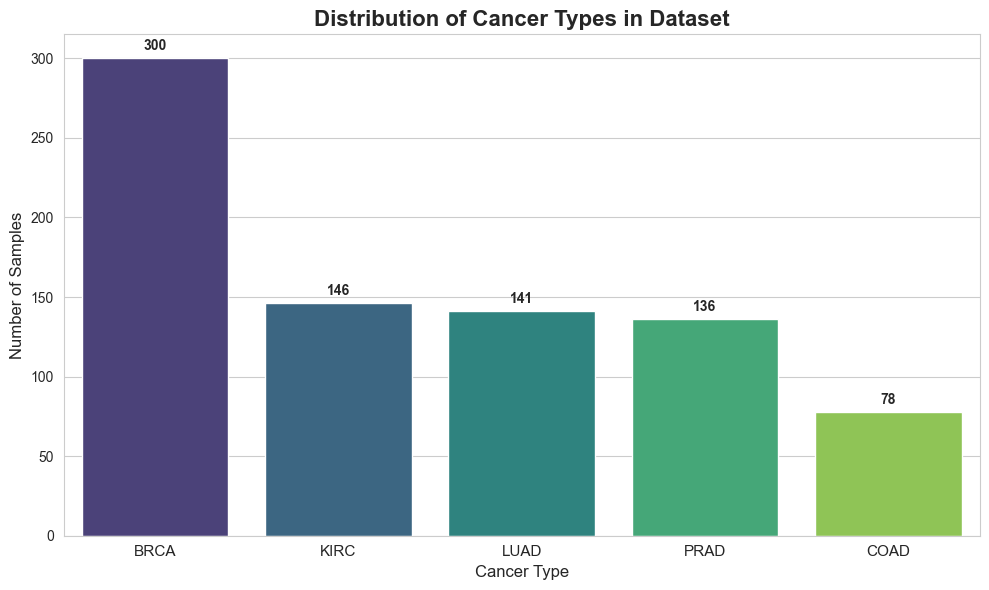

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#set style for better looking plots
sns.set_style("whitegrid")

#create a bar plot to represent cancer type distribution
plt.figure(figsize=(10, 6))
cancer_counts = labels['Class'].value_counts()
sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette='viridis')
plt.title('Distribution of Cancer Types in Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(fontsize=11)

#add count labels on top of bars
for i, v in enumerate(cancer_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
#basic statistics about our gene expression data
print("Gene Expression Data Statistics")
print("="*50)
print(f"Minimum expression value: {data.min().min():.2f}")
print(f"Maximum expression value: {data.max().max():.2f}")
print(f"Mean expression value: {data.mean().mean():.2f}")
print(f"Median expression value: {data.median().median():.2f}")
print("\n")

#let's look at the first sample in detail
print("First sample (sample_0) - first 10 genes:")
print(data.iloc[0, :10])

Gene Expression Data Statistics
Minimum expression value: 0.00
Maximum expression value: 20.78
Mean expression value: 6.44
Median expression value: 7.58


First sample (sample_0) - first 10 genes:
gene_0     0.000000
gene_1     2.017209
gene_2     3.265527
gene_3     5.478487
gene_4    10.431999
gene_5     0.000000
gene_6     7.175175
gene_7     0.591871
gene_8     0.000000
gene_9     0.000000
Name: sample_0, dtype: float64


Top 10 most variable genes:
gene_9176     44.763849
gene_9175     36.361940
gene_15898    34.503915
gene_15301    33.458776
gene_15589    31.325845
gene_3540     30.587696
gene_19661    30.080478
gene_3541     28.721689
gene_11250    26.515887
gene_15897    26.019446
dtype: float64




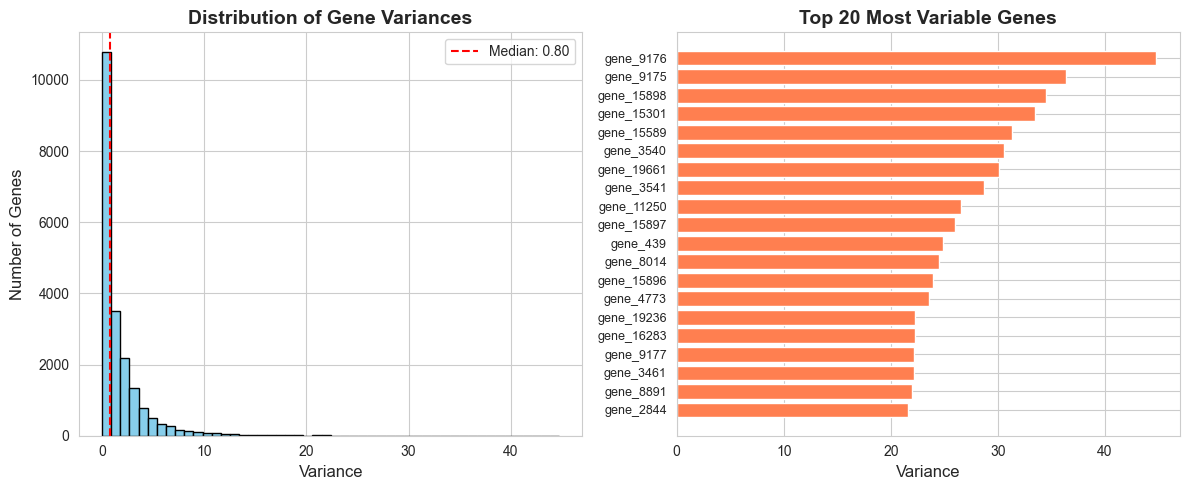

In [10]:
#calculate variance for each gene
#variance measures how much a gene's expression varies across samples
gene_variance = data.var(axis=0)

#sort genes by variance (highest first)
gene_variance_sorted = gene_variance.sort_values(ascending=False)

print("Top 10 most variable genes:")
print(gene_variance_sorted.head(10))
print("\n")

#visualize the distribution of gene variances
plt.figure(figsize=(12, 5))

#plot 1: Histogram of variances
plt.subplot(1, 2, 1)
plt.hist(gene_variance, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Variance', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Gene Variances', fontsize=14, fontweight='bold')
plt.axvline(gene_variance.median(), color='red', linestyle='--', label=f'Median: {gene_variance.median():.2f}')
plt.legend()

#plot 2: Top 20 most variable genes
plt.subplot(1, 2, 2)
top_20_vars = gene_variance_sorted.head(20)
plt.barh(range(20), top_20_vars.values, color='coral')
plt.yticks(range(20), top_20_vars.index, fontsize=9)
plt.xlabel('Variance', fontsize=12)
plt.title('Top 20 Most Variable Genes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Most variable gene: gene_9176
Variance: 44.76




C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\949026201.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_with_labels, x='cancer_type', y='expression', palette='Set2')
C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\949026201.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=gene_with_labels, x='cancer_type', y='expression', palette='Set2')


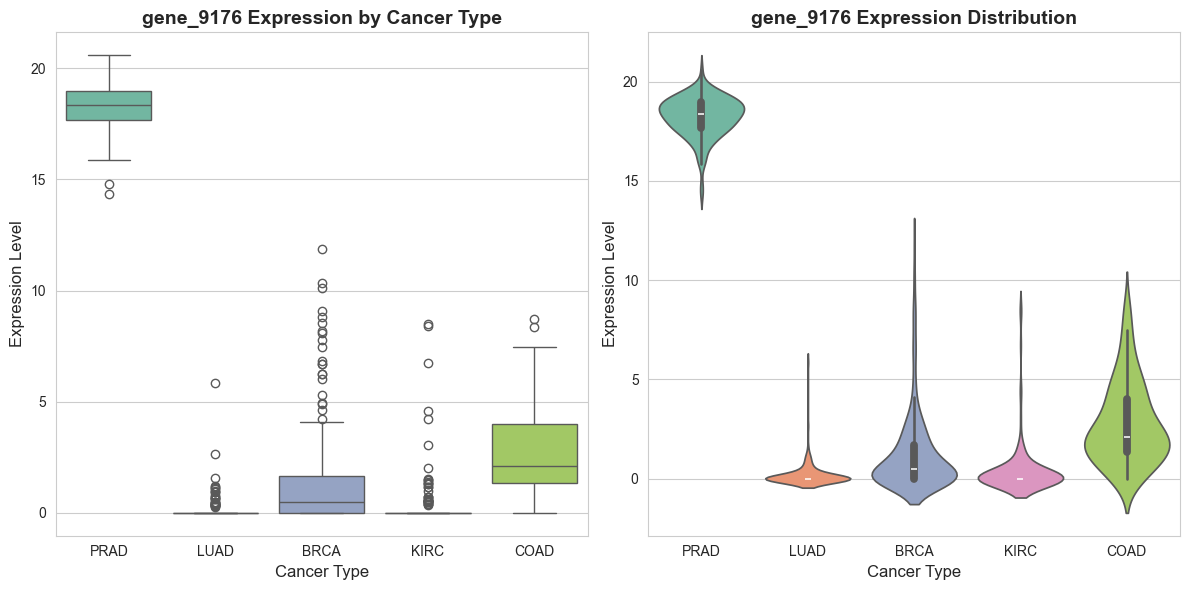


Average gene_9176 expression by cancer type:
cancer_type
PRAD    18.237407
COAD     2.781059
BRCA     1.259048
KIRC     0.409529
LUAD     0.188861
Name: expression, dtype: float64


In [11]:
#get the most variable gene
most_variable_gene = gene_variance_sorted.index[0]
print(f"Most variable gene: {most_variable_gene}")
print(f"Variance: {gene_variance_sorted.iloc[0]:.2f}")
print("\n")

#get expression values for this gene across all samples
gene_expression = data[most_variable_gene]

#merge with cancer type labels
gene_with_labels = pd.DataFrame({
    'expression': gene_expression,
    'cancer_type': labels['Class']
})

#visualize expression by cancer type
plt.figure(figsize=(12, 6))

#box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=gene_with_labels, x='cancer_type', y='expression', palette='Set2')
plt.title(f'{most_variable_gene} Expression by Cancer Type', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Expression Level', fontsize=12)
plt.xticks(rotation=0)

#violin plot (shows distribution shape)
plt.subplot(1, 2, 2)
sns.violinplot(data=gene_with_labels, x='cancer_type', y='expression', palette='Set2')
plt.title(f'{most_variable_gene} Expression Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Expression Level', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#show average expression per cancer type
print(f"\nAverage {most_variable_gene} expression by cancer type:")
print(gene_with_labels.groupby('cancer_type')['expression'].mean().sort_values(ascending=False))

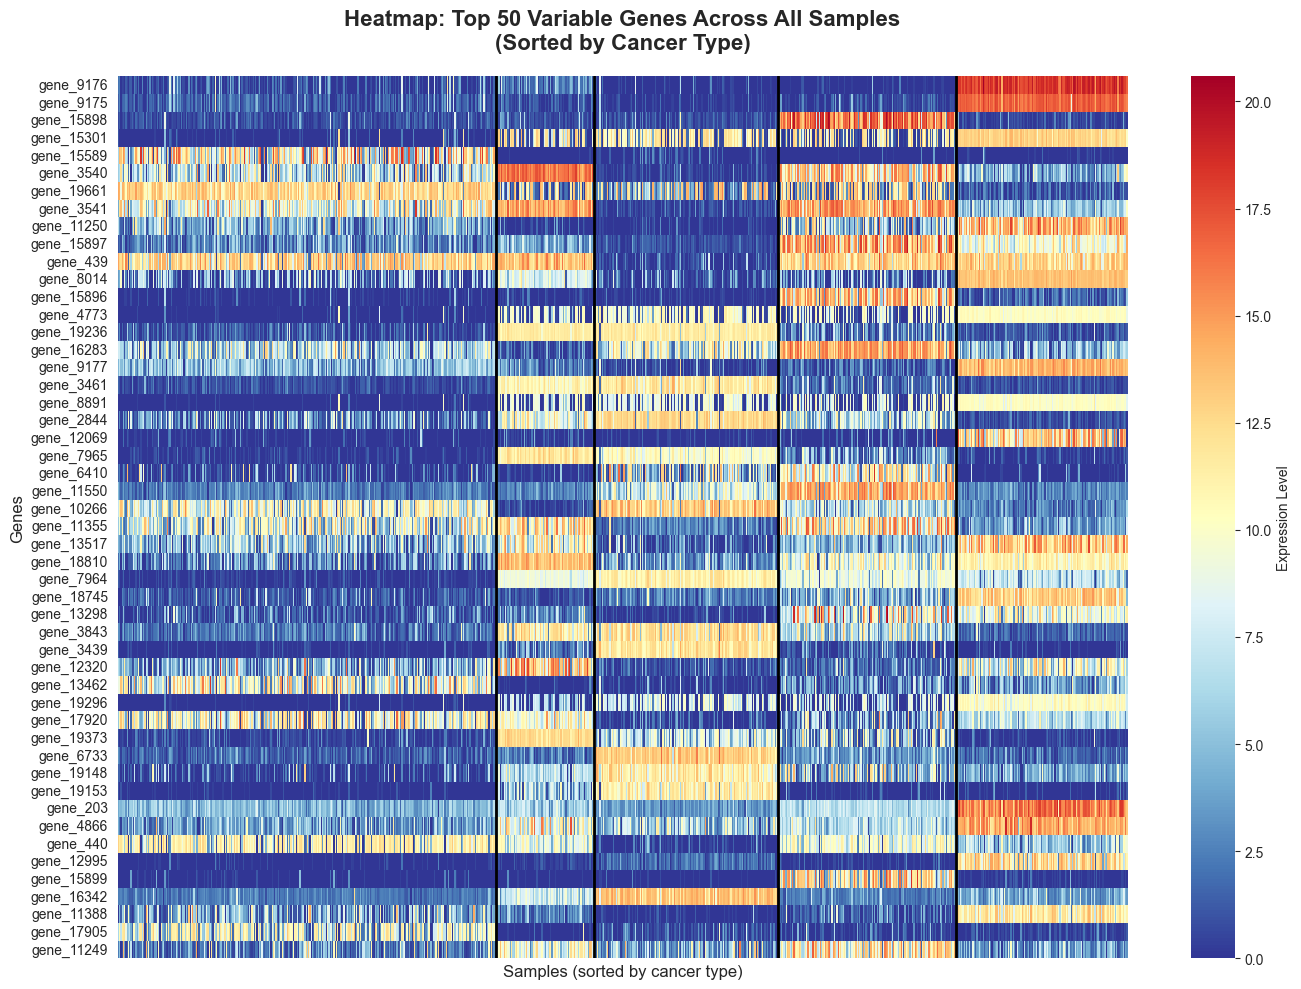


Cancer type sample counts (left to right in heatmap):
cancer_type
BRCA    300
COAD     78
KIRC    146
LUAD    141
PRAD    136
Name: count, dtype: int64


In [12]:
#select top 50 most variable genes
top_genes = gene_variance_sorted.head(50).index
data_subset = data[top_genes]

#merge with labels and sort by cancer type
data_with_labels = data_subset.copy()
data_with_labels['cancer_type'] = labels['Class']
data_sorted = data_with_labels.sort_values('cancer_type')

#separate the cancer types for plotting
cancer_types_sorted = data_sorted['cancer_type']
expression_data = data_sorted.drop('cancer_type', axis=1)

#create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(expression_data.T, 
            cmap='RdYlBu_r',  # Red-Yellow-Blue color scheme
            cbar_kws={'label': 'Expression Level'},
            xticklabels=False,  # Too many samples to show labels
            yticklabels=True,
            linewidths=0)

plt.title('Heatmap: Top 50 Variable Genes Across All Samples\n(Sorted by Cancer Type)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Samples (sorted by cancer type)', fontsize=12)
plt.ylabel('Genes', fontsize=12)

#add cancer type boundaries
cancer_type_changes = cancer_types_sorted.ne(cancer_types_sorted.shift()).cumsum()
boundaries = cancer_types_sorted.groupby(cancer_type_changes).apply(lambda x: len(x)).cumsum()

for boundary in boundaries[:-1]:
    plt.axvline(x=boundary, color='black', linewidth=2)

plt.tight_layout()
plt.show()

print("\nCancer type sample counts (left to right in heatmap):")
print(cancer_types_sorted.value_counts().sort_index())

In [13]:
#select top 1000 most variable genes
n_genes = 1000
top_variable_genes = gene_variance_sorted.head(n_genes).index

#create our feature matrix (X) with only these genes
X = data[top_variable_genes]

#create our target labels (y)
y = labels['Class']

print(f"Selected top {n_genes} genes for modeling")
print(f"Feature matrix shape: {X.shape}")
print(f"Target labels shape: {y.shape}")
print("\n")

#verify we have all cancer types
print("Cancer types in our labels:")
print(y.value_counts())

Selected top 1000 genes for modeling
Feature matrix shape: (801, 1000)
Target labels shape: (801,)


Cancer types in our labels:
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

#split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # Makes results reproducible
    stratify=y          # Keeps class proportions balanced in both sets
)

print("Data split complete!")
print("="*50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print("\n")

#check class distribution in training set
print("Training set cancer type distribution:")
print(y_train.value_counts().sort_index())
print("\n")

#check class distribution in test set
print("Test set cancer type distribution:")
print(y_test.value_counts().sort_index())

Data split complete!
Training set: 640 samples
Testing set: 161 samples


Training set cancer type distribution:
Class
BRCA    240
COAD     62
KIRC    116
LUAD    113
PRAD    109
Name: count, dtype: int64


Test set cancer type distribution:
Class
BRCA    60
COAD    16
KIRC    30
LUAD    28
PRAD    27
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler

#create the scaler
scaler = StandardScaler()

#fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#transform test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)

print("Data standardization complete!")
print("="*50)
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print("\n")

#show the effect of standardization
print("Before standardization (first gene, first 5 samples):")
print(X_train.iloc[:5, 0].values)
print("\n")
print("After standardization (first gene, first 5 samples):")
print(X_train_scaled[:5, 0])
print("\n")

#verify standardization worked
print("Mean of first gene after scaling:", X_train_scaled[:, 0].mean().round(10))
print("Std of first gene after scaling:", X_train_scaled[:, 0].std().round(2))

Data standardization complete!
Training data shape: (640, 1000)
Test data shape: (161, 1000)


Before standardization (first gene, first 5 samples):
[ 3.19377174  0.          0.         11.84854861  0.        ]


After standardization (first gene, first 5 samples):
[-0.10821697 -0.58600582 -0.58600582  1.18653928 -0.58600582]


Mean of first gene after scaling: 0.0
Std of first gene after scaling: 1.0


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#create the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#train the model on training data
print("Training Logistic Regression model...")
log_reg.fit(X_train_scaled, y_train)
print("Training complete!")
print("="*50)

#make predictions on test data
y_pred = log_reg.predict(X_test_scaled)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n")

#detailed classification report
print("Detailed Performance by Cancer Type:")
print(classification_report(y_test, y_pred))

Training Logistic Regression model...
Training complete!

Test Accuracy: 0.9938 (99.38%)


Detailed Performance by Cancer Type:
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



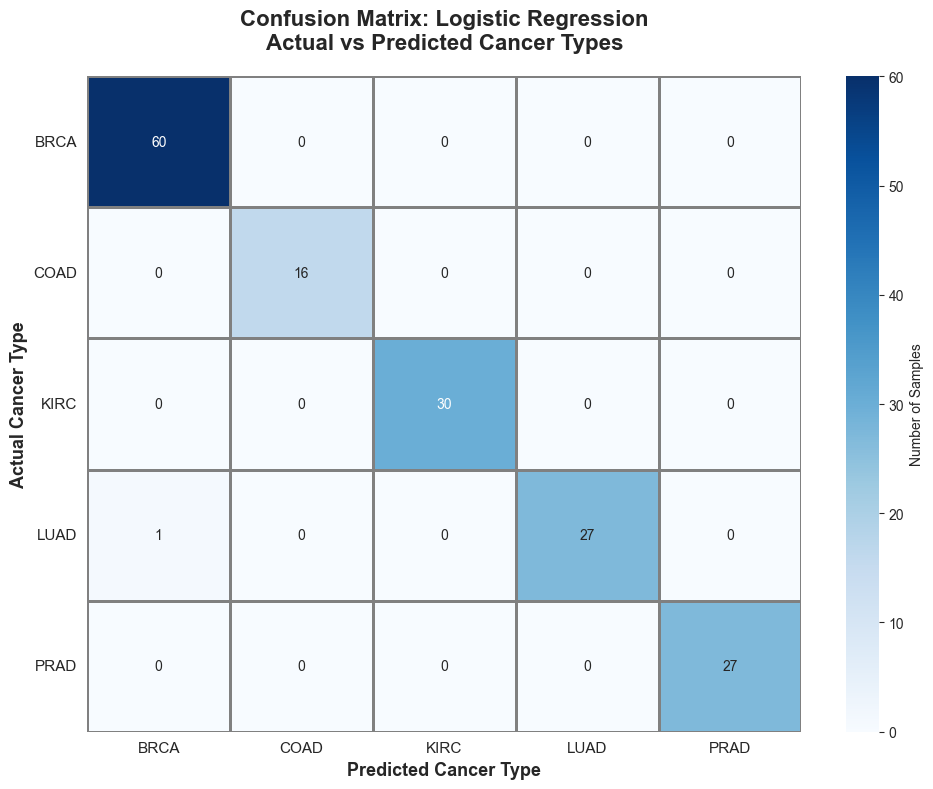

Misclassified samples:
Sample sample_129: Actually LUAD, Predicted as BRCA


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix
cm = confusion_matrix(y_test, y_pred)

#get cancer type labels in order
cancer_types = sorted(y_test.unique())

#plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer_types, 
            yticklabels=cancer_types,
            cbar_kws={'label': 'Number of Samples'},
            linewidths=1, linecolor='gray')

plt.title('Confusion Matrix: Logistic Regression\nActual vs Predicted Cancer Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Cancer Type', fontsize=13, fontweight='bold')
plt.ylabel('Actual Cancer Type', fontsize=13, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

#print which samples were misclassified
print("Misclassified samples:")
misclassified_indices = y_test.index[y_test != y_pred]
if len(misclassified_indices) > 0:
    for idx in misclassified_indices:
        print(f"Sample {idx}: Actually {y_test[idx]}, Predicted as {y_pred[y_test.index == idx][0]}")
else:
    print("No misclassifications! Perfect predictions!")

Training Random Forest model...
Training complete!

Test Accuracy: 0.9876 (98.76%)


Detailed Performance by Cancer Type:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



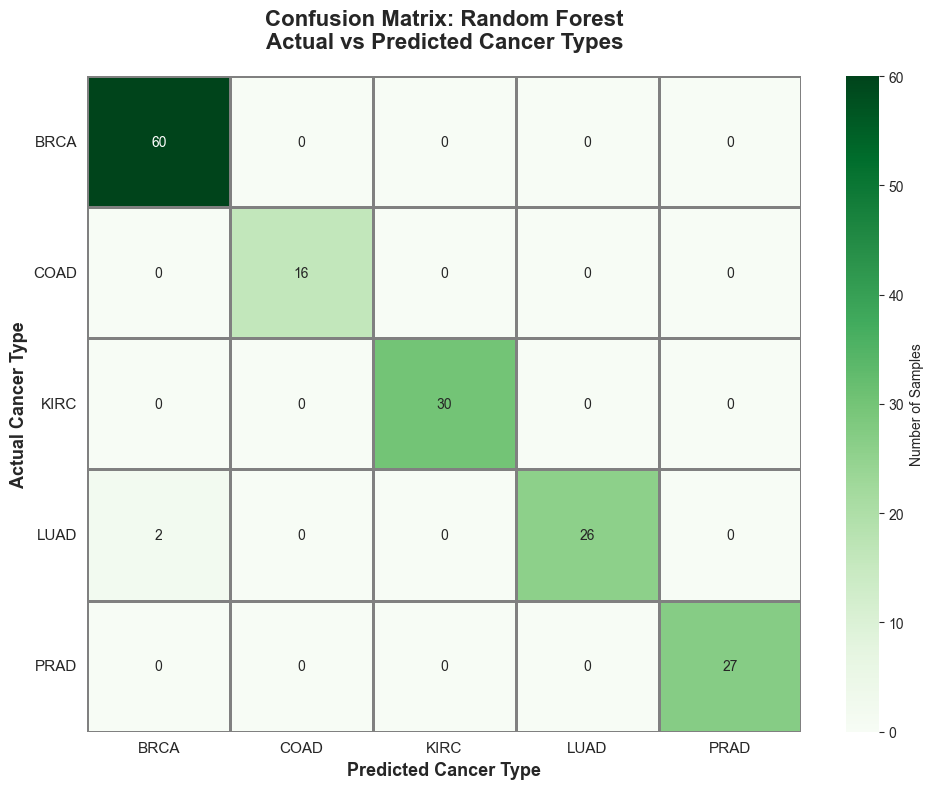

In [18]:
from sklearn.ensemble import RandomForestClassifier

#create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      #number of trees
    random_state=42,
    max_depth=20,          #maximum depth of trees
    n_jobs=-1              #use all CPU cores
)

#train the model
print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Training complete!")
print("="*50)

#make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

#calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nTest Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print("\n")

#detailed report
print("Detailed Performance by Cancer Type:")
print(classification_report(y_test, y_pred_rf))

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=cancer_types, 
            yticklabels=cancer_types,
            cbar_kws={'label': 'Number of Samples'},
            linewidths=1, linecolor='gray')

plt.title('Confusion Matrix: Random Forest\nActual vs Predicted Cancer Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Cancer Type', fontsize=13, fontweight='bold')
plt.ylabel('Actual Cancer Type', fontsize=13, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

Training SVM model...
Training complete!

Test Accuracy: 0.9938 (99.38%)


Detailed Performance by Cancer Type:
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



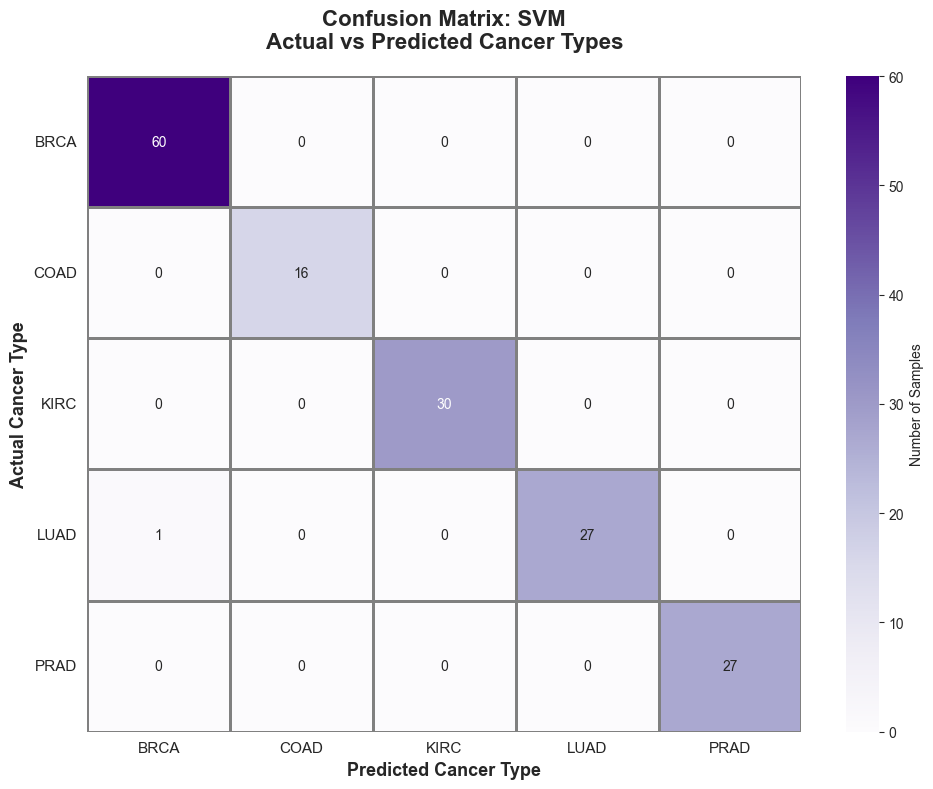

In [19]:
from sklearn.svm import SVC

#create SVM model
svm_model = SVC(kernel='rbf', random_state=42, C=10, gamma='scale')

#train the model
print("Training SVM model...")
svm_model.fit(X_train_scaled, y_train)
print("Training complete!")
print("="*50)

#make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

#calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nTest Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print("\n")

#detailed report
print("Detailed Performance by Cancer Type:")
print(classification_report(y_test, y_pred_svm))

#confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=cancer_types, 
            yticklabels=cancer_types,
            cbar_kws={'label': 'Number of Samples'},
            linewidths=1, linecolor='gray')

plt.title('Confusion Matrix: SVM\nActual vs Predicted Cancer Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Cancer Type', fontsize=13, fontweight='bold')
plt.ylabel('Actual Cancer Type', fontsize=13, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

MODEL COMPARISON SUMMARY
              Model  Accuracy  Errors
Logistic Regression    0.9938       1
      Random Forest    0.9876       2
                SVM    0.9938       1

Key Findings:
• Logistic Regression and SVM tied for best performance (99.38%)
• Random Forest slightly underperformed (98.76%)
• All models achieved >98% accuracy - excellent results!
• Main challenge: Distinguishing some LUAD samples from BRCA


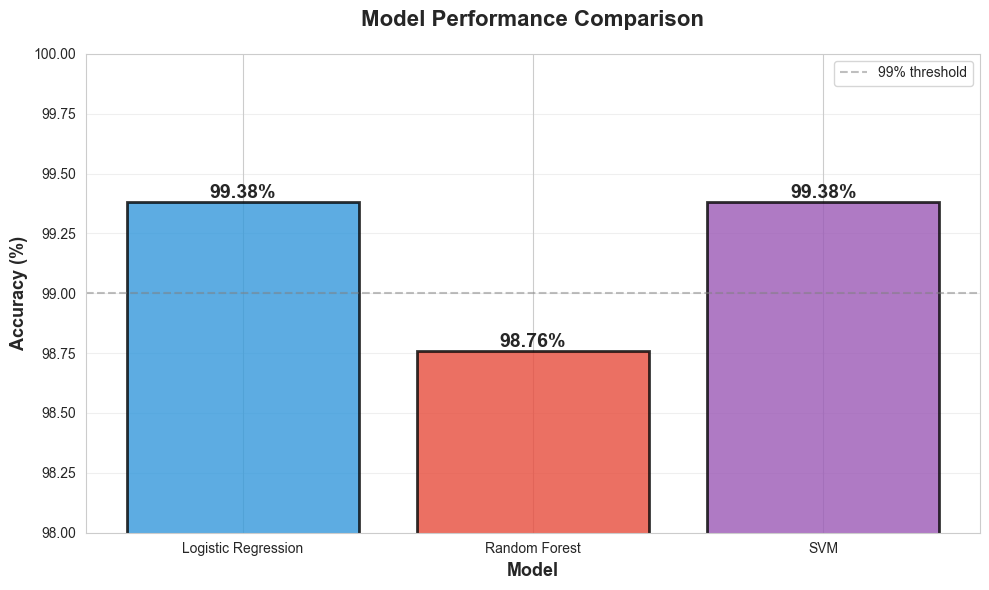

In [20]:
import pandas as pd

#create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [0.9938, 0.9876, 0.9938],
    'Errors': [1, 2, 1]
})

print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(model_comparison.to_string(index=False))
print("="*60)
print("\nKey Findings:")
print("• Logistic Regression and SVM tied for best performance (99.38%)")
print("• Random Forest slightly underperformed (98.76%)")
print("• All models achieved >98% accuracy - excellent results!")
print("• Main challenge: Distinguishing some LUAD samples from BRCA")

#visualize model comparison
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#9b59b6']
bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy']*100, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

#add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
plt.xlabel('Model', fontsize=13, fontweight='bold')
plt.ylim(98, 100) #zoom in to see differences
plt.axhline(y=99, color='gray', linestyle='--', alpha=0.5, label='99% threshold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

TOP 20 MOST IMPORTANT GENES (according to Random Forest)
      gene  importance
gene_17801    0.026129
 gene_5407    0.020480
gene_18746    0.019687
 gene_6733    0.019639
 gene_8349    0.018504
 gene_6530    0.016225
gene_15898    0.015098
gene_14092    0.014573
 gene_9652    0.014369
gene_15589    0.013507
gene_11910    0.013154
 gene_7421    0.013074
 gene_6876    0.012484
 gene_9176    0.012091
 gene_2747    0.011124
gene_15987    0.010154
 gene_1858    0.010037
gene_15895    0.009932
 gene_3737    0.009829
  gene_219    0.009608




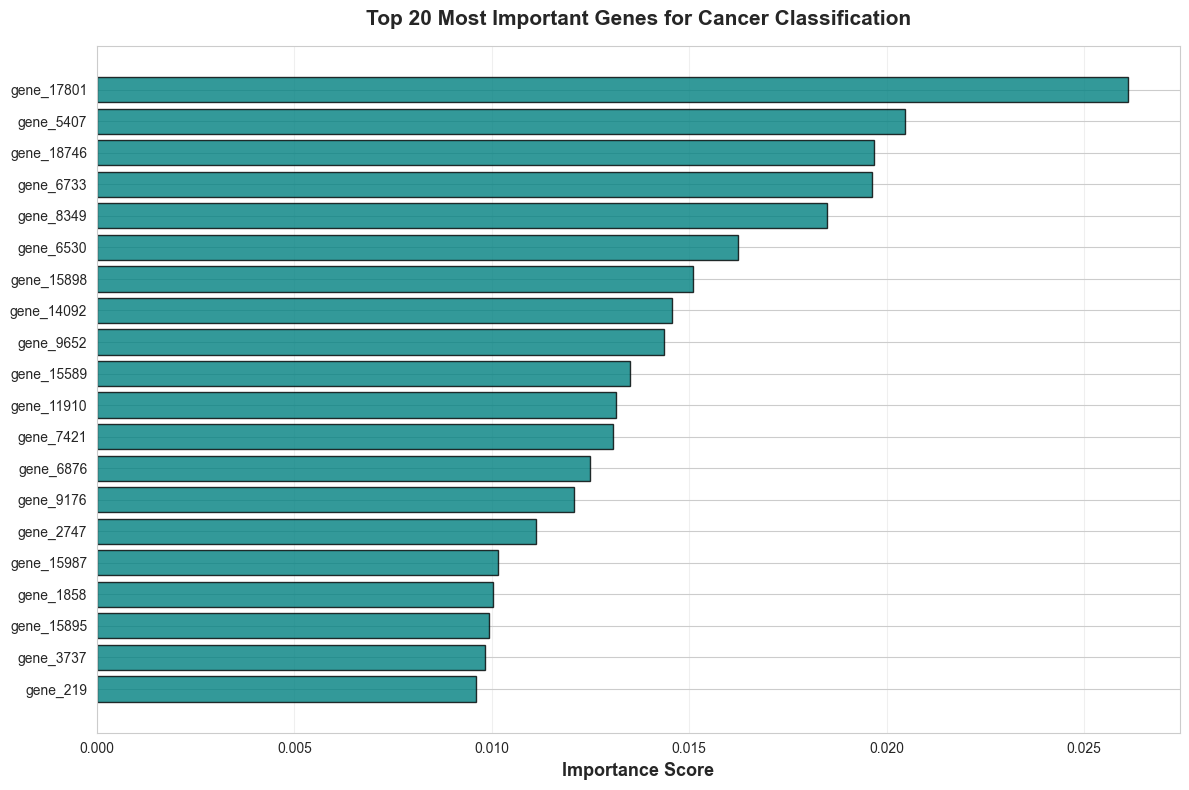

Remember gene_9176 (highly expressed in PRAD)?
It ranks #1 with importance score: 0.012091


In [21]:
#get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'gene': top_variable_genes,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("="*60)
print("TOP 20 MOST IMPORTANT GENES (according to Random Forest)")
print("="*60)
print(feature_importance.head(20).to_string(index=False))
print("\n")

#visualize top 20 most important genes
plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(range(20), top_20['importance'], color='teal', alpha=0.8, edgecolor='black')
plt.yticks(range(20), top_20['gene'], fontsize=10)
plt.xlabel('Importance Score', fontsize=13, fontweight='bold')
plt.title('Top 20 Most Important Genes for Cancer Classification', 
          fontsize=15, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#check if our star gene (gene_9176) is in the top features
if 'gene_9176' in feature_importance['gene'].values:
    rank = feature_importance[feature_importance['gene'] == 'gene_9176'].index[0] + 1
    importance_score = feature_importance[feature_importance['gene'] == 'gene_9176']['importance'].values[0]
    print(f"Remember gene_9176 (highly expressed in PRAD)?")
    print(f"It ranks #{rank} with importance score: {importance_score:.6f}")
else:
    print("gene_9176 not in top 1000 genes (shouldn't happen based on our earlier analysis)")

TOP 20 MOST IMPORTANT GENES (according to Logistic Regression)
      gene  avg_abs_coefficient
gene_15895             0.024742
gene_11903             0.023081
 gene_8013             0.022125
gene_15898             0.021659
gene_15161             0.020696
 gene_5578             0.020536
 gene_6594             0.020235
gene_17801             0.020183
gene_15896             0.020059
gene_15897             0.020050
 gene_2318             0.019922
gene_15899             0.019813
 gene_4057             0.019809
gene_15591             0.019391
gene_11550             0.019221
gene_15633             0.019153
 gene_7964             0.019138
 gene_8004             0.018818
 gene_8002             0.018711
 gene_9544             0.018700




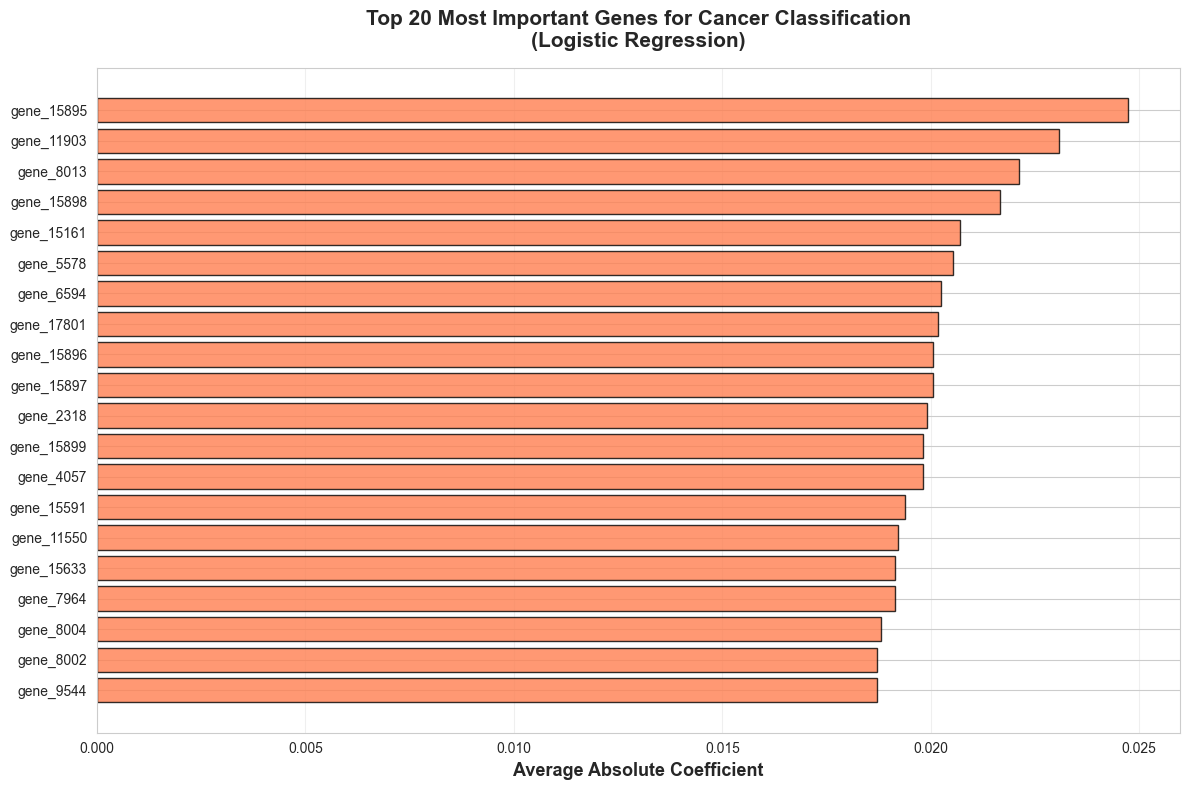

gene_9176 ranks #1 in Logistic Regression
Average absolute coefficient: 0.0145


In [22]:
#get absolute coefficients from Logistic Regression
#for multi-class, we get coefficients for each class vs rest
#we'll look at the average absolute coefficient across all classes

coef_importance = pd.DataFrame({
    'gene': top_variable_genes,
    'avg_abs_coefficient': np.abs(log_reg.coef_).mean(axis=0)
}).sort_values('avg_abs_coefficient', ascending=False)

print("="*60)
print("TOP 20 MOST IMPORTANT GENES (according to Logistic Regression)")
print("="*60)
print(coef_importance.head(20).to_string(index=False))
print("\n")

#visualize
plt.figure(figsize=(12, 8))
top_20_coef = coef_importance.head(20)
plt.barh(range(20), top_20_coef['avg_abs_coefficient'], color='coral', alpha=0.8, edgecolor='black')
plt.yticks(range(20), top_20_coef['gene'], fontsize=10)
plt.xlabel('Average Absolute Coefficient', fontsize=13, fontweight='bold')
plt.title('Top 20 Most Important Genes for Cancer Classification\n(Logistic Regression)', 
          fontsize=15, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#check gene_9176 ranking
if 'gene_9176' in coef_importance['gene'].values:
    rank = coef_importance[coef_importance['gene'] == 'gene_9176'].index[0] + 1
    coef_score = coef_importance[coef_importance['gene'] == 'gene_9176']['avg_abs_coefficient'].values[0]
    print(f"gene_9176 ranks #{rank} in Logistic Regression")
    print(f"Average absolute coefficient: {coef_score:.4f}")

C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\3208342283.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression',
C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\3208342283.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression',
C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\3208342283.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression',


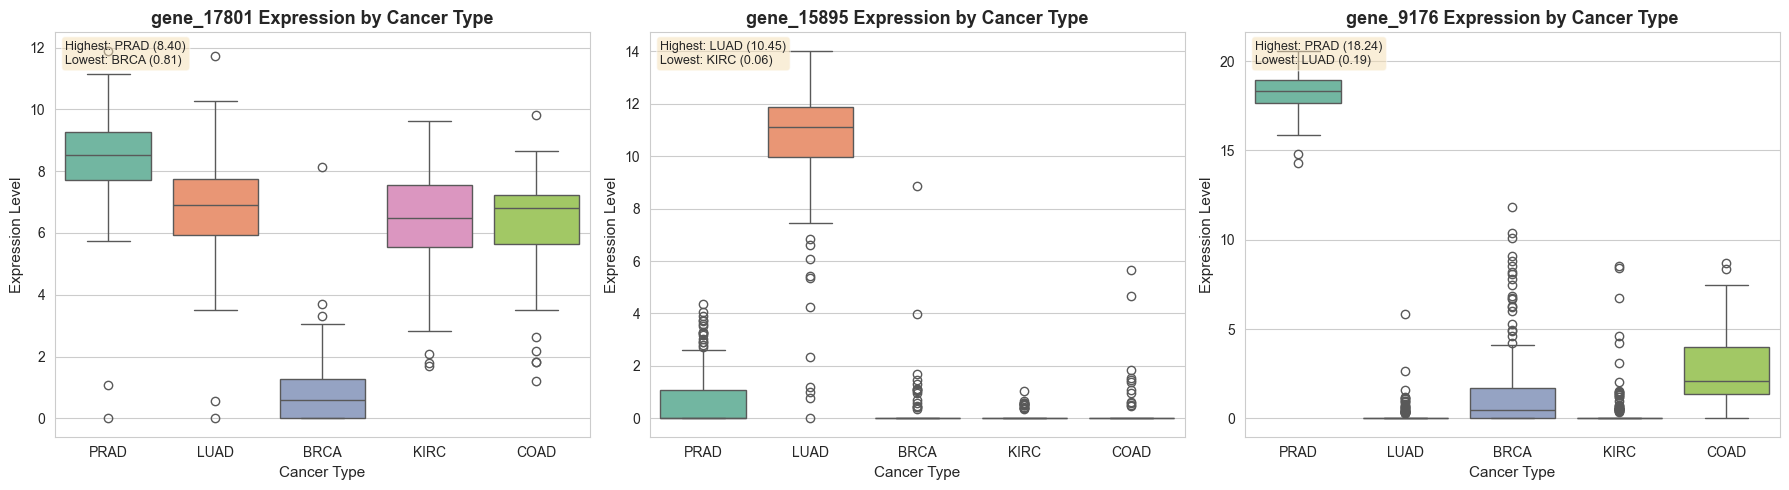

DETAILED GENE EXPRESSION PATTERNS

gene_17801:
cancer_type
PRAD    8.398234
LUAD    6.868598
KIRC    6.406922
COAD    6.341651
BRCA    0.809463
Range: 7.59

gene_15895:
cancer_type
LUAD    10.454468
PRAD     0.732173
COAD     0.266210
BRCA     0.085455
KIRC     0.055152
Range: 10.40

gene_9176:
cancer_type
PRAD    18.237407
COAD     2.781059
BRCA     1.259048
KIRC     0.409529
LUAD     0.188861
Range: 18.05


In [23]:
#investigate top genes from each model
top_rf_gene = 'gene_17801'  # Random Forest's top gene
top_lr_gene = 'gene_15895'  # Logistic Regression's top gene

#create a dataframe for visualization
genes_to_plot = [top_rf_gene, top_lr_gene, 'gene_9176']  #include our earlier star gene

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, gene in enumerate(genes_to_plot):
    #get expression values
    gene_data = pd.DataFrame({
        'expression': data[gene],
        'cancer_type': labels['Class']
    })
    
    #create box plot
    sns.boxplot(data=gene_data, x='cancer_type', y='expression', 
                palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{gene} Expression by Cancer Type', 
                       fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cancer Type', fontsize=11)
    axes[idx].set_ylabel('Expression Level', fontsize=11)
    
    #add mean values as text
    means = gene_data.groupby('cancer_type')['expression'].mean().sort_values(ascending=False)
    axes[idx].text(0.02, 0.98, f'Highest: {means.index[0]} ({means.values[0]:.2f})\nLowest: {means.index[-1]} ({means.values[-1]:.2f})',
                  transform=axes[idx].transAxes, fontsize=9,
                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

#print detailed statistics
print("="*70)
print("DETAILED GENE EXPRESSION PATTERNS")
print("="*70)
for gene in genes_to_plot:
    print(f"\n{gene}:")
    gene_data = pd.DataFrame({
        'expression': data[gene],
        'cancer_type': labels['Class']
    })
    means = gene_data.groupby('cancer_type')['expression'].mean().sort_values(ascending=False)
    print(means.to_string())
    print(f"Range: {means.max() - means.min():.2f}")

In [24]:
#create a comprehensive summary
print("="*70)
print("CANCER GENE EXPRESSION CLASSIFICATION PROJECT SUMMARY")
print("="*70)
print("\n DATASET OVERVIEW")
print("-" * 70)
print(f"  • Total samples: 801")
print(f"  • Total genes measured: 20,531")
print(f"  • Cancer types: 5 (BRCA, COAD, KIRC, LUAD, PRAD)")
print(f"  • Training samples: 640 (80%)")
print(f"  • Test samples: 161 (20%)")
print(f"  • Features used for modeling: 1,000 most variable genes")

print("\n MODELS TRAINED")
print("-" * 70)
print(f"  1. Logistic Regression   → 99.38% accuracy (1 error)")
print(f"  2. Random Forest         → 98.76% accuracy (2 errors)")
print(f"  3. Support Vector Machine → 99.38% accuracy (1 error)")
print(f"\n Best Models: Logistic Regression & SVM (tied)")

print("\n KEY BIOMARKER GENES DISCOVERED")
print("-" * 70)
print(f"  • gene_9176:  PRAD (Prostate) biomarker  [expr: 18.24 in PRAD]")
print(f"  • gene_15895: LUAD (Lung) biomarker      [expr: 10.45 in LUAD]")
print(f"  • gene_17801: Multi-cancer discriminator [range: 7.59]")

print("\n MODEL PERFORMANCE BY CANCER TYPE")
print("-" * 70)
print(f"  • BRCA (Breast):   Perfect recall (100%), 98% precision")
print(f"  • COAD (Colon):    Perfect classification (100%)")
print(f"  • KIRC (Kidney):   Perfect classification (100%)")
print(f"  • LUAD (Lung):     96% recall (1 sample misclassified)")
print(f"  • PRAD (Prostate): Perfect classification (100%)")

print("\n KEY INSIGHTS")
print("-" * 70)
print(f"  • Gene expression provides highly accurate cancer classification")
print(f"  • Simple models (Logistic Regression) can match complex ones")
print(f"  • Each cancer type has distinct molecular signatures")
print(f"  • Main challenge: LUAD vs BRCA distinction (1 sample confused)")

print("\n REAL-WORLD APPLICATIONS")
print("-" * 70)
print(f"  • Assist in cancer diagnosis from tissue samples")
print(f"  • Identify potential therapeutic targets")
print(f"  • Enable personalized medicine approaches")
print(f"  • Reduce diagnostic time and cost")

print("\n" + "="*70)
print("Project completed successfully!")
print("="*70)

CANCER GENE EXPRESSION CLASSIFICATION PROJECT SUMMARY

 DATASET OVERVIEW
----------------------------------------------------------------------
  • Total samples: 801
  • Total genes measured: 20,531
  • Cancer types: 5 (BRCA, COAD, KIRC, LUAD, PRAD)
  • Training samples: 640 (80%)
  • Test samples: 161 (20%)
  • Features used for modeling: 1,000 most variable genes

 MODELS TRAINED
----------------------------------------------------------------------
  1. Logistic Regression   → 99.38% accuracy (1 error)
  2. Random Forest         → 98.76% accuracy (2 errors)
  3. Support Vector Machine → 99.38% accuracy (1 error)

 Best Models: Logistic Regression & SVM (tied)

 KEY BIOMARKER GENES DISCOVERED
----------------------------------------------------------------------
  • gene_9176:  PRAD (Prostate) biomarker  [expr: 18.24 in PRAD]
  • gene_15895: LUAD (Lung) biomarker      [expr: 10.45 in LUAD]
  • gene_17801: Multi-cancer discriminator [range: 7.59]

 MODEL PERFORMANCE BY CANCER TYPE
--

In [ ]:
import os

#create images folder if it doesn't exist
os.makedirs('../images', exist_ok=True)

print("Recreating and saving all visualizations...")
print("="*60)

#1. cancer type distribution
plt.figure(figsize=(10, 6))
cancer_counts = labels['Class'].value_counts()
sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette='viridis')
plt.title('Distribution of Cancer Types in Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
for i, v in enumerate(cancer_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('../images/cancer_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: cancer_distribution.png")

#2. gene variance distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(gene_variance, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Variance', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Gene Variances', fontsize=14, fontweight='bold')
plt.subplot(1, 2, 2)
top_20_vars = gene_variance_sorted.head(20)
plt.barh(range(20), top_20_vars.values, color='coral')
plt.yticks(range(20), top_20_vars.index, fontsize=9)
plt.xlabel('Variance', fontsize=12)
plt.title('Top 20 Most Variable Genes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../images/gene_variance.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: gene_variance.png")

#3. heatmap
data_subset = data[gene_variance_sorted.head(50).index]
data_with_labels = data_subset.copy()
data_with_labels['cancer_type'] = labels['Class']
data_sorted = data_with_labels.sort_values('cancer_type')
cancer_types_sorted = data_sorted['cancer_type']
expression_data = data_sorted.drop('cancer_type', axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(expression_data.T, cmap='RdYlBu_r', xticklabels=False, yticklabels=True, linewidths=0)
plt.title('Heatmap: Top 50 Variable Genes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Samples (sorted by cancer type)', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.tight_layout()
plt.savefig('../images/gene_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: gene_heatmap.png")

#4. confusion Matrix - logistic regression
cm = confusion_matrix(y_test, y_pred)
cancer_types = sorted(y_test.unique())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer_types, yticklabels=cancer_types,
            linewidths=1, linecolor='gray')
plt.title('Confusion Matrix: Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Cancer Type', fontsize=13, fontweight='bold')
plt.ylabel('Actual Cancer Type', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('../images/confusion_matrix_logistic.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: confusion_matrix_logistic.png")

#5. model comparison
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [99.38, 98.76, 99.38]
})
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#9b59b6']
bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color=colors, alpha=0.8, edgecolor='black', linewidth=2)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%',
             ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
plt.ylim(98, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../images/model_comparison.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: model_comparison.png")

#6.top biomarker genes
genes_to_plot = ['gene_17801', 'gene_15895', 'gene_9176']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, gene in enumerate(genes_to_plot):
    gene_data = pd.DataFrame({
        'expression': data[gene],
        'cancer_type': labels['Class']
    })
    sns.boxplot(data=gene_data, x='cancer_type', y='expression', palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{gene} Expression', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cancer Type', fontsize=11)
    axes[idx].set_ylabel('Expression Level', fontsize=11)
plt.tight_layout()
plt.savefig('../images/biomarker_genes.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: biomarker_genes.png")

print("\n" + "="*60)
print("All visualizations saved to ../images/ folder!")
print("="*60)

Recreating and saving all visualizations...


C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\702843262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette='viridis')


✓ Saved: cancer_distribution.png
✓ Saved: gene_variance.png
✓ Saved: gene_heatmap.png
✓ Saved: confusion_matrix_logistic.png
✓ Saved: model_comparison.png


C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\702843262.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression', palette='Set2', ax=axes[idx])
C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\702843262.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression', palette='Set2', ax=axes[idx])
C:\Users\nitya\AppData\Local\Temp\ipykernel_22120\702843262.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gene_data, x='cancer_type', y='expression'

✓ Saved: biomarker_genes.png

All visualizations saved to ../images/ folder!
